In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("datos.csv", encoding="latin1")
df = df[df["ID"] > 60]
df.rename(columns={'Ethical technology assessment?':'Ethical technology assessment'}, inplace=True)

bach = df[df['program'] == 'bachelor']
mast = df[df['program'] == 'master']

b_aal = bach[bach['campus'] == 'AAL']
m_aal = mast[mast['campus'] == 'AAL']

b_cph = bach[bach['campus'] == 'CPH']
m_cph = mast[mast['campus'] == 'CPH']

esb = df[df['campus'] == 'ESB']

In [109]:
col1 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most4'
col2 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most5'
col3 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most6'

cursos_b_aal = list(set(b_aal[col1]) | set(b_aal[col2]) | set(b_aal[col3]))
cursos_m_aal = list(set(m_aal[col1]) | set(m_aal[col2]) | set(m_aal[col3]))

pref_b_aal = b_aal[cursos_b_aal]
pref_m_aal = m_aal[cursos_m_aal]

In [145]:
def count_pref(data):

    cp1 = {}
    cp2 = {}
    cp3 = {}

    for col in data.columns:
        cp1[col] = int(data[col].value_counts().get(1.0, 0))
        cp2[col] = int(data[col].value_counts().get(2.0, 0))
        cp3[col] = int(data[col].value_counts().get(3.0, 0))

    return cp1, cp2, cp3

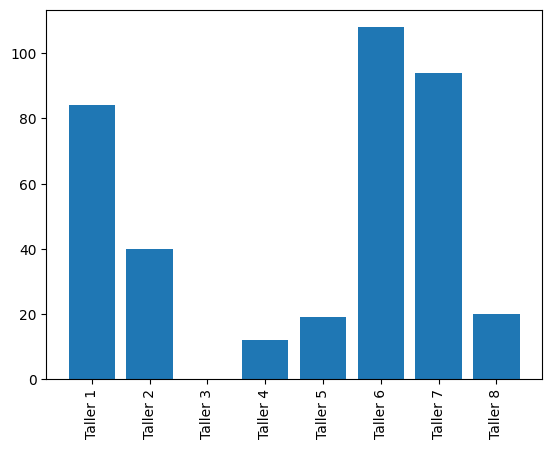

In [186]:
m_aal_1,m_aal_2,m_aal_3 = count_pref(pref_m_aal)
plt.bar(['Taller ' + str(i + 1) for i in range(8)], m_aal_1.values())
plt.xticks(rotation=90)
plt.show()

/var/folders/8x/2_xy04_n0gs51pp95f6ltysh0000gn/T/ipykernel_64695/2290267585.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)
/var/folders/8x/2_xy04_n0gs51pp95f6ltysh0000gn/T/ipykernel_64695/2290267585.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)
/var/folders/8x/2_xy04_n0gs51pp95f6ltysh0000gn/T/ipykernel_64695/2290267585.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


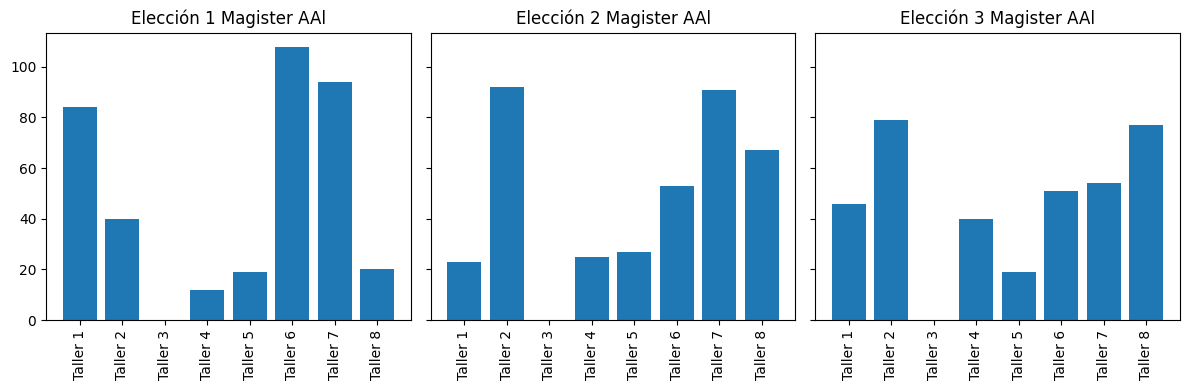

In [211]:
dicts = [m_aal_1, m_aal_2, m_aal_3]
titles = ["Elección 1 Magister AAl", "Elección 2 Magister AAl", "Elección 3 Magister AAl"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, d, title in zip(axes, dicts, titles):
    labels = ['Taller ' + str(i + 1) for i in range(len(d))]
    values = list(d.values())
    
    ax.bar(labels, values)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [212]:
def aux_fun(n):
    if n == 1 or n == 2 or n == 3:
        return 1
    return 0

def prod_esp(col1, col2):
    col1 = col1.apply(aux_fun)
    col2 = col2.apply(aux_fun)
    return col1.dot(col2)

In [213]:
mat = []
for i in pref_b_aal.columns:
    fila = []
    for j in pref_b_aal.columns:
        fila.append(prod_esp(pref_b_aal[i], pref_b_aal[j]))
        if i == j:
            fila[-1] = 0
    mat.append(fila)

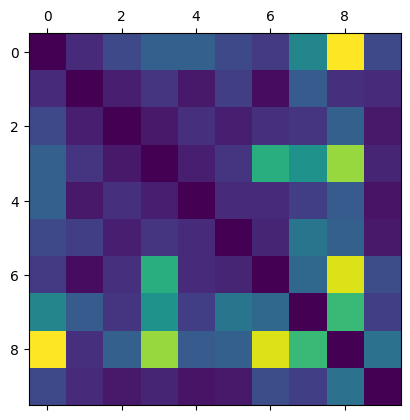

In [214]:
plt.matshow(mat)